1. Develop a program to create histograms for all numerical features and analyze the distribution of each feature. Generate box plots for all numerical features and identify any outliers. Use California Housing dataset.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Step 1: Load the California Housing dataset
data = fetch_california_housing(as_frame=True)
housing_df = data.frame

# Step 2: Create histograms for numerical features
numerical_features = housing_df.select_dtypes(include=[np.number]).columns

# Plot histograms
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(housing_df[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Step 3: Generate box plots for numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=housing_df[feature], color='orange')
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

# Step 4: Identify outliers using the IQR method
print("Outliers Detection:")
outliers_summary = {}
for feature in numerical_features:
    Q1 = housing_df[feature].quantile(0.25)
    Q3 = housing_df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = housing_df[(housing_df[feature] < lower_bound) | (housing_df[feature] > upper_bound)]
    outliers_summary[feature] = len(outliers)
    print(f"{feature}: {len(outliers)} outliers")

# Optional: Print a summary of the dataset
print("\nDataset Summary:")
print(housing_df.describe())


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np

In [2]:
data = fetch_california_housing()
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
data = fetch_california_housing(as_frame = True)
df = data.frame
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [4]:
numerical_features = df.select_dtypes(include=[np.number]).columns
numerical_features

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

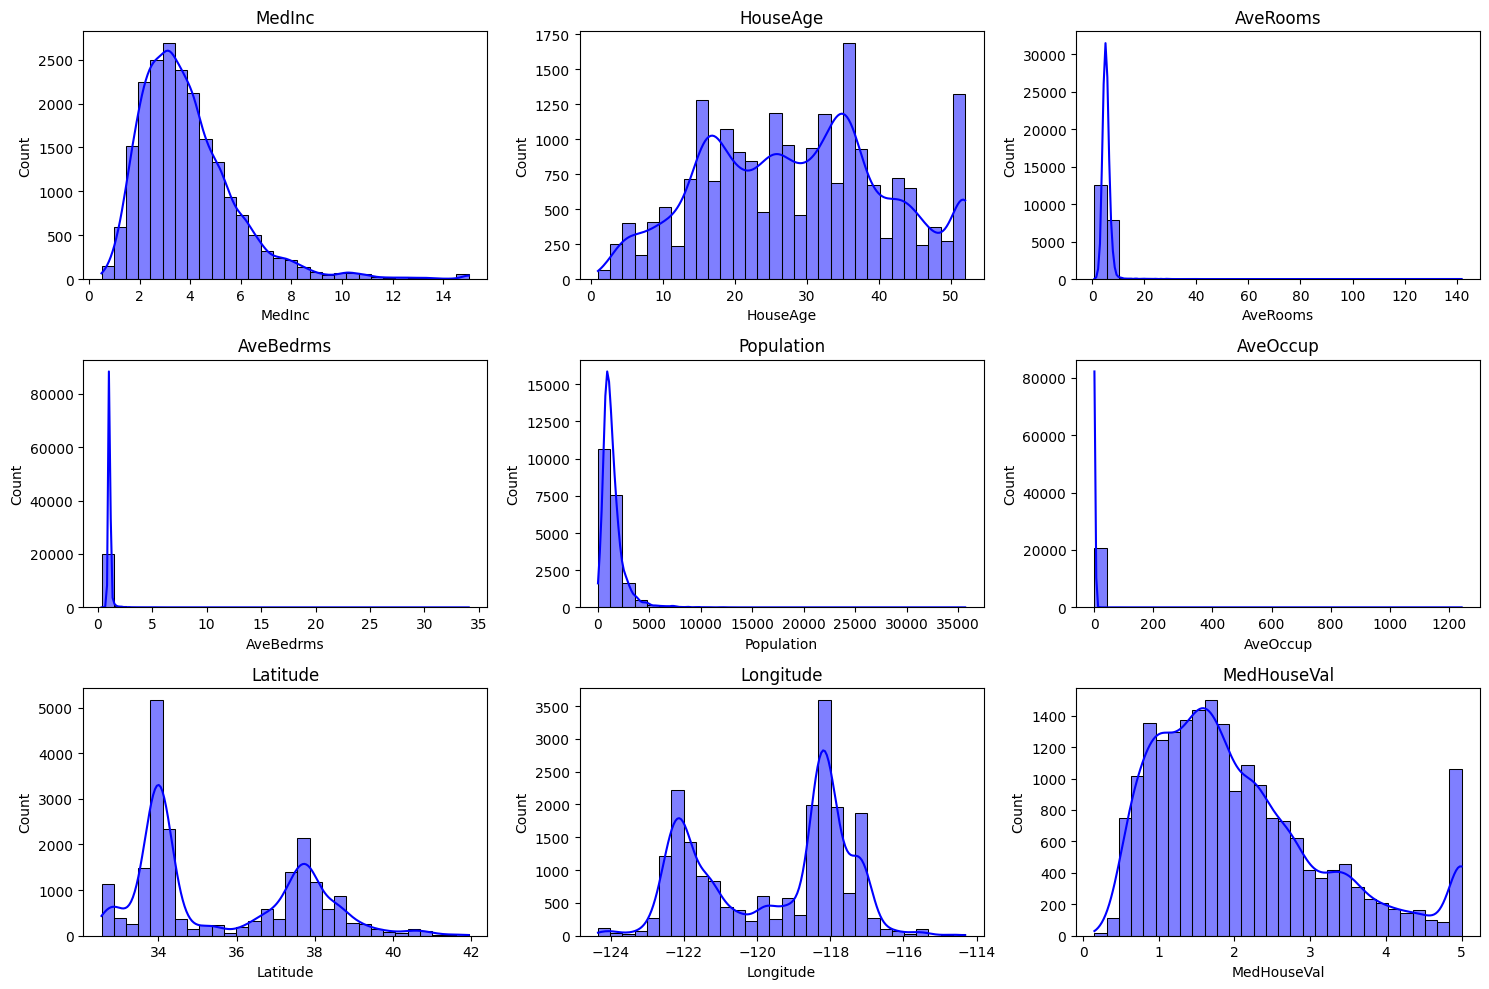

In [22]:
plt.figure(figsize=(15,10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3,3,i+1)
    sns.histplot(df[feature], kde=True, bins=30, color="blue")
    plt.title(feature)
plt.tight_layout()
plt.show()

In [7]:
data = enumerate(numerical_features)
list(data)

[(0, 'MedInc'),
 (1, 'HouseAge'),
 (2, 'AveRooms'),
 (3, 'AveBedrms'),
 (4, 'Population'),
 (5, 'AveOccup'),
 (6, 'Latitude'),
 (7, 'Longitude'),
 (8, 'MedHouseVal')]

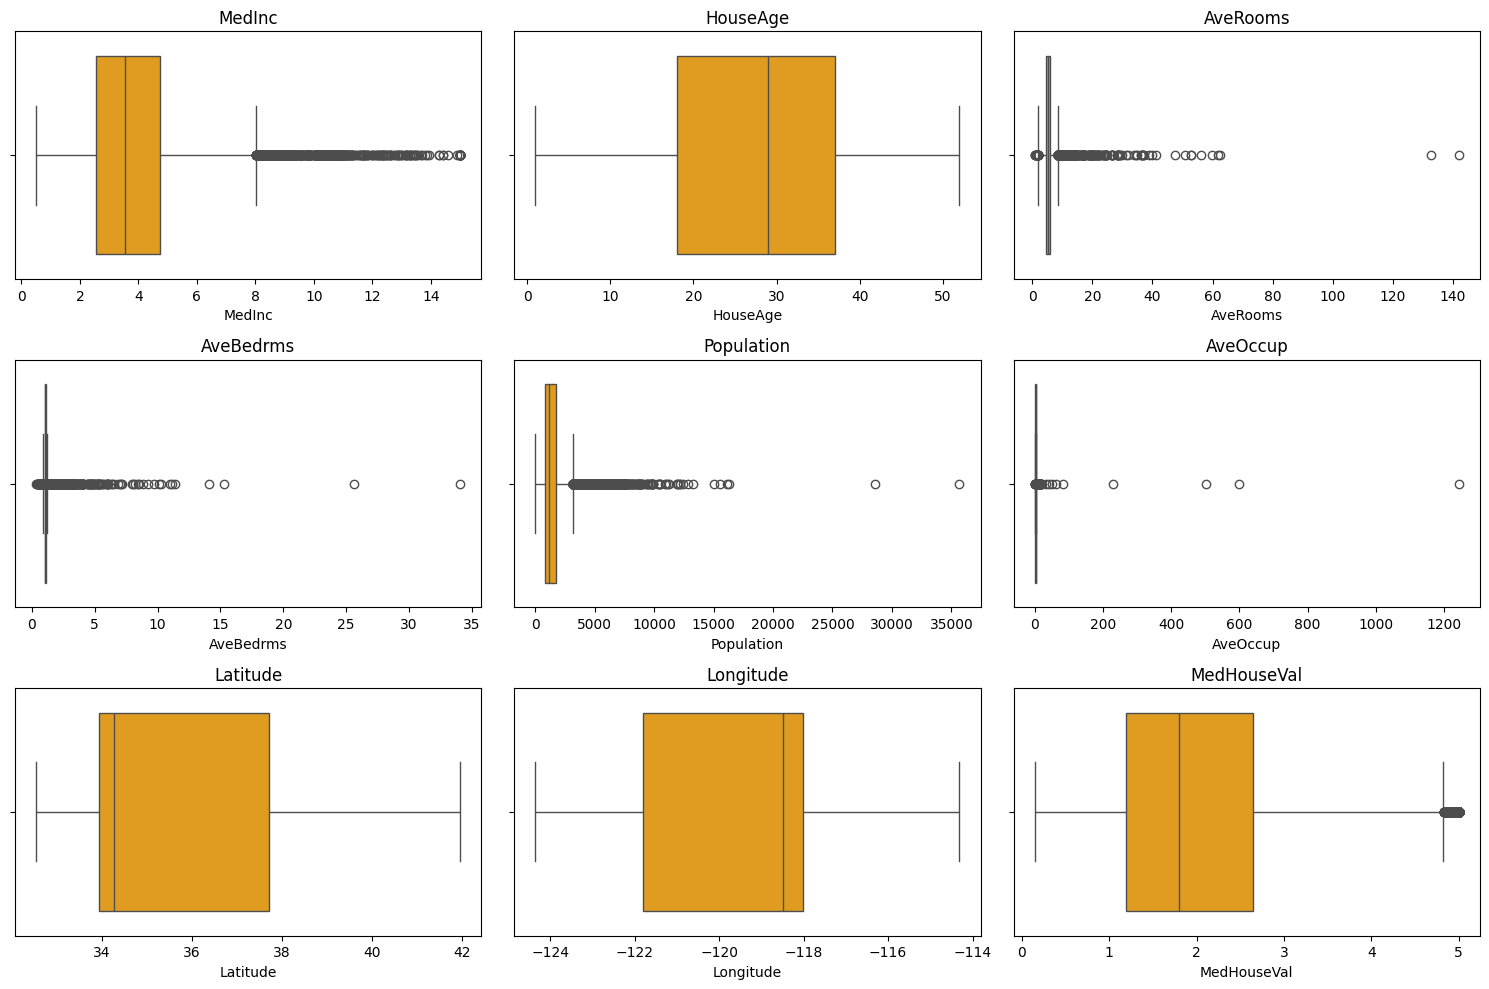

In [25]:
plt.figure(figsize=(15,10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=df[feature], color="orange")
    plt.title(feature)
plt.tight_layout()
plt.show()

In [32]:
print("Outliers Detection:")
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    print(f"{feature}: {len(outliers)} outliers")

Outliers Detection:
MedInc: 681 outliers
HouseAge: 0 outliers
AveRooms: 511 outliers
AveBedrms: 1424 outliers
Population: 1196 outliers
AveOccup: 711 outliers
Latitude: 0 outliers
Longitude: 0 outliers
MedHouseVal: 1071 outliers
